<a href="https://colab.research.google.com/github/ayberkcorp/cap5610-machine_learning/blob/master/hw6/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install surprise

     |████████████████████████████████| 11.8MB 265kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670933 sha256=6e252cb012950333480702f469de9f25c9c09afaaaf61ac5b390c8958fbc42e2
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


### Read data from “ratings.csv” with line format: 'userID movieID rating timestamp'.

In [ ]:
from google.colab import files
import io
import pandas as pd
from surprise import Reader, Dataset

# Using ratings_small.csv instead
data_to_load = files.upload()
ratings_df = pd.read_csv(io.BytesIO(data_to_load['ratings_small.csv']))

reader = Reader(rating_scale=(1, 5))
ratings_data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

Saving ratings_small.csv to ratings_small.csv


### Compute the average MAE and RMSE of the Probabilistic Matrix Factorization (PMF), User based Collaborative Filtering, Item based Collaborative Filtering, under the 5-folds cross-validation

In [ ]:
from surprise import SVD
from surprise.model_selection import cross_validate

algo = SVD(biased=False)
pmf_results = cross_validate(algo, ratings_data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7803  0.7843  0.7761  0.7796  0.7778  0.7796  0.0028  
RMSE (testset)    1.0138  1.0149  1.0042  1.0079  1.0045  1.0091  0.0045  
Fit time          4.06    3.99    4.01    3.96    4.02    4.01    0.03    
Test time         0.16    0.16    0.10    0.10    0.15    0.14    0.03    


In [ ]:
from surprise import KNNWithMeans

algo = KNNWithMeans(sim_options={'name': 'MSD', 'user_based': True}, verbose=False)
user_results_msd = cross_validate(algo, ratings_data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7021  0.6997  0.7050  0.7036  0.7067  0.7034  0.0024  
RMSE (testset)    0.9153  0.9119  0.9197  0.9225  0.9239  0.9186  0.0045  
Fit time          0.11    0.12    0.13    0.12    0.12    0.12    0.01    
Test time         1.39    1.33    1.34    1.37    1.50    1.39    0.06    


In [ ]:
algo_CF_item_msd = KNNWithMeans(sim_options={'name': 'MSD', 'user_based': False}, verbose=False)
item_results_msd = cross_validate(algo, ratings_data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7045  0.7029  0.6966  0.7071  0.7034  0.7029  0.0035  
RMSE (testset)    0.9189  0.9158  0.9139  0.9246  0.9193  0.9185  0.0037  
Fit time          0.13    0.13    0.12    0.14    0.13    0.13    0.01    
Test time         1.43    1.36    1.44    1.48    1.39    1.42    0.04    


### Compare the average (mean) performances of User-based collaborative filtering, item-based collaborative filtering, PMF with respect to RMSE and MAE.

In [ ]:
from statistics import mean

print('RMSE Performances:')
print('User-based:', mean(user_results_msd['test_rmse']))
print('Item-based:', mean(item_results_msd['test_rmse']))
print('PMF:', mean(pmf_results['test_rmse']))

print('\nMAE Performances:')
print('User-based:', mean(user_results_msd['test_mae']))
print('Item-based:', mean(item_results_msd['test_mae']))
print('PMF:', mean(pmf_results['test_mae']))

RMSE Performances:
User-based: 0.9186374029089243
Item-based: 0.9185132541669495
PMF: 1.0090631631898688

MAE Performances:
User-based: 0.703428418855196
Item-based: 0.7028968420942884
PMF: 0.7796294344008419


### Examine how the cosine, MSD (Mean Squared Difference), and Pearson similarities impact the performances of User based Collaborative Filtering and Item based Collaborative Filtering.

The MSD performance results for both types of filtering can be found above.

User based:

In [ ]:
# cosine
algo = KNNWithMeans(sim_options={'name': 'cosine', 'user_based': True}, verbose=False)
user_results_cosine = cross_validate(algo, ratings_data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7081  0.7036  0.7143  0.7012  0.7099  0.7074  0.0046  
RMSE (testset)    0.9203  0.9196  0.9301  0.9194  0.9299  0.9239  0.0050  
Fit time          0.31    0.31    0.31    0.31    0.32    0.31    0.00    
Test time         1.42    1.34    1.35    1.36    1.38    1.37    0.03    


In [ ]:
# Pearson
algo = KNNWithMeans(sim_options={'name': 'pearson_baseline', 'user_based': True}, verbose=False)
user_results_pearson = cross_validate(algo, ratings_data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7020  0.6990  0.7044  0.7047  0.6982  0.7016  0.0027  
RMSE (testset)    0.9248  0.9209  0.9255  0.9280  0.9204  0.9239  0.0029  
Fit time          0.41    0.41    0.41    0.41    0.41    0.41    0.00    
Test time         1.23    1.25    1.28    1.28    1.24    1.25    0.02    


Item based:

In [ ]:
# cosine
algo = KNNWithMeans(sim_options={'name': 'cosine', 'user_based': False}, verbose=False)
item_results_cosine = cross_validate(algo, ratings_data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7154  0.7112  0.7051  0.7087  0.7099  0.7100  0.0034  
RMSE (testset)    0.9334  0.9277  0.9183  0.9219  0.9295  0.9262  0.0054  
Fit time          12.45   12.00   11.70   12.06   11.99   12.04   0.24    
Test time         5.05    5.06    5.15    5.17    5.14    5.11    0.05    


In [ ]:
# Pearson
algo = KNNWithMeans(sim_options={'name': 'pearson_baseline', 'user_based': False}, verbose=False)
item_results_pearson = cross_validate(algo, ratings_data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6889  0.6865  0.6910  0.6879  0.6891  0.6887  0.0015  
RMSE (testset)    0.9107  0.9072  0.9070  0.9031  0.9023  0.9060  0.0031  
Fit time          7.36    7.33    7.25    7.46    7.35    7.35    0.07    
Test time         5.20    5.21    5.25    5.14    5.03    5.17    0.08    


### Plot your results.

User based:

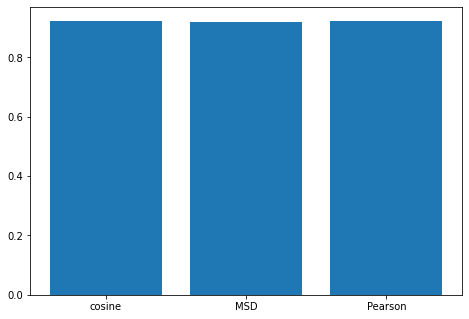

In [ ]:
import matplotlib.pyplot as plt

# RMSE comparisons
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(['cosine', 'MSD', 'Pearson'],
       [mean(user_results_cosine['test_rmse']), mean(user_results_msd['test_rmse']), mean(user_results_pearson['test_rmse'])]);

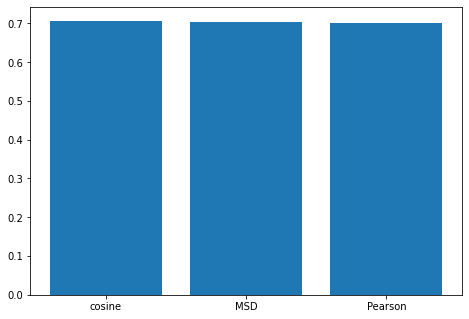

In [ ]:
# MAE comparisons
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(['cosine', 'MSD', 'Pearson'],
       [mean(user_results_cosine['test_mae']), mean(user_results_msd['test_mae']), mean(user_results_pearson['test_mae'])]);

Item based:

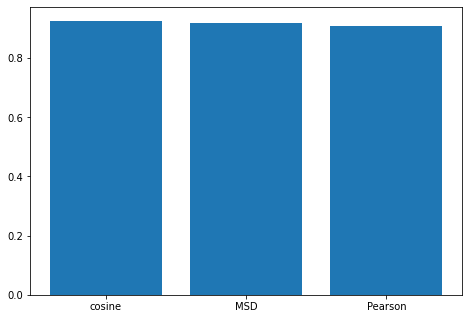

In [ ]:
# RMSE comparisons
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(['cosine', 'MSD', 'Pearson'],
       [mean(item_results_cosine['test_rmse']), mean(item_results_msd['test_rmse']), mean(item_results_pearson['test_rmse'])]);

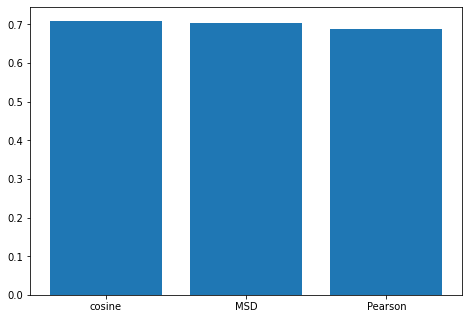

In [ ]:
# MAE comparisons
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(['cosine', 'MSD', 'Pearson'],
       [mean(item_results_cosine['test_mae']), mean(item_results_msd['test_mae']), mean(item_results_pearson['test_mae'])]);